![](https://raw.githubusercontent.com/climate-in-the-cloud/workshop/master/water-waves/space_time_diagram.png)

# Lab F3: Water waves

In this lab, we will study surface gravity waves (water waves) to examine some concepts from wave theory: 

- Linear wave solutions
- Dispersive and non-dispersive waves
- Phase velocity and space-time diagrams

To use this notebook, you will need Python 3 and the latest version of [Dedalus](http://dedalus-project.org/) installed on your local machine. 

If you do not have Python 3 and Dedalus, you can run the lab on [Google Colaboratory](http://colab.research.google.com). 

## Introducing Colab

[Google Colaboratory](http://colab.research.google.com/) (or "Colab", for short) is a python notebook that you can run in a browser window. Colab notebooks are just like Jupyter notebooks, except that they are hosted on the cloud. This means that you do not need to have python installed on your local machine --- you can run it straight from a web browser. 

You will need a (free) [Google Account](https://myaccount.google.com/intro) to run the notebooks. If you would prefer not to sign up, you can still read the notebook, but you won't be able to run the code cells. 

Colab should look and feel very similar to a Jupyter notebook. One minor difference is that the keyboard shortcut to execute a code cell is **CMD/CTRL+ENTER**, while **SHIFT+ENTER** will move you to the next cell. You can also click the play button to the left of each cell. 

Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI)  to learn more, or check out this [Overview of Colab Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb). 

##Colab and Google Drive

Colab integrates with Google Drive, so you can save your notebook, figures, and movies to your own Drive if you would like. This is not required to run the lab, because figures and movies will be saved to the Colab virtual machine and displayed in your browser. 

If you would like to save your notebook, copy and paste the following code snippet to mount your Google Drive in Colab. The command will send you to a new browser window (make sure you allow pop-ups) to give permission for Colab to access your Drive. You can then locate your Google Drive by navigating to `drive/'My Drive'`: 

```
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'
```

You can also save your notebook to Google Drive, or download a copy of the notebook file, using the **File Menu** in the top left corner. 

# Background 


![water-waves.png](attachment:water-waves.png)

## Constant density incompressible flow in 2D 

In this lab we will study water waves propagating in a 2D domain of length $L$ and height $H$. We define $x$ to be the horizontal coordinate and $z$ to be the vertical coordinate. The dynamical fields we will work with are: 

$$
\mbox{2D velocity:} \qquad \mathbf{u} = u\left(x,z,t\right) \mathbf{i} + w(x,z,t) \, \mathbf{k}
$$

$$
\mbox{Pressure:} \qquad p = p(x,z,t)
$$

$$
\mbox{Surface height:} \qquad \eta = \eta(x,t)
$$

where $\mathbf{i}$ and $\mathbf{k}$ are unit vectors in the $x$ and $z$-directions, respectively. Notice that the height of the upper surface is a function of $x$ and $t$ only. 

To keep things simple, we will assume that the water has constant density $\rho = 1$ and linearize the equations of motion about a rest state. This means that we will be studying the evolution of very small perturbations to the fluid. The detailed derivation of these linearized equations is given at the end of this lab. 

## Linearized system

![boundary-conditions.png](attachment:boundary-conditions.png)

The full linearized system of equations we want to solve are:  

$$
\mbox{Incompressibility:} \qquad \partial_x \, u + \partial_z \, w = 0,
$$

$$
x\mbox{-momentum:} \qquad \partial_t \, u + \partial_x \, p = 0, 
$$

$$
z\mbox{-momentum:} \qquad \partial_t \, w + \partial_z \, p = 0, 
$$

We also have boundary conditions (BC's) for each boundary of our domain. We will assume that the domain is periodic in the $x$-direction, so we impose _periodic boundary conditions_ so that $p$, $u$, and $w$ are all periodic functions in the $x$-direction. At the upper and upper boundaries we have: 

$$
\mbox{Lower BC:} \qquad w = 0 \quad \mbox{on} \quad z = -H,
$$

$$
\mbox{Upper BC:} \qquad \partial_t \, p - g \, w = 0 \quad \mbox{on} \quad z = 0.
$$

Finally, although the surface height $\eta$ does not appear explictly in the system of equations to solve, it is a diagnostic variable which can be calculated from the other (prognostic) quantities

$$
\eta = p(z = 0) / g,
$$

where $g$ is the acceleration due to gravity. 

# Experimental setup

## Installing Dedalus

We will use a python library called [Dedalus](http://dedalus-project.org/) to solve the linearized water wave equations. 

We start by installing Dedalus on the Colab virtual machine. This might take a few minutes. 

**Type SHIFT+ENTER (or click RUN from the menu above) to execute each cell.**

In [ ]:
## Check Dedalus isn't already installed
try:
  import dedalus.public as de
  print("Dedalus already installed")
except:
  print("Dedalus not installed yet. Let's do it.")

  # Step 1: Install FFTW
  !apt-get install libfftw3-dev
  !apt-get install libfftw3-mpi-dev

  # Step 2: Set paths for Dedalus installation
  import os
  os.environ['MPI_INCLUDE_PATH'] = "/usr/lib/x86_64-linux-gnu/openmpi/include"
  os.environ['MPI_LIBRARY_PATH'] = "/usr/lib/x86_64-linux-gnu"
  os.environ['FFTW_INCLUDE_PATH'] = "/usr/include"
  os.environ['FFTW_LIBRARY_PATH'] = "/usr/lib/x86_64-linux-gnu"

  # Step 3: Install Dedalus using pip
  !pip3 install dedalus

  # Step 4: Check Dedalus is importable
  print()
  print()
  try:
    import dedalus.public as de
    print("Dedalus successfully installed :)")
  except:
    print("Error installing Dedalus :(")
    raise

Dedalus not installed yet. Let's do it.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,766 kB of archives.
After this operation, 21.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-long3 amd64 3.3.7-1 [308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-quad3 amd64 3.3.7-1 [552 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-single3 amd64 3.3.7-1 [764 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-bin amd64 3.3.7-1 [32.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic


## Libraries


First we import the necessary libraries and call some commands so we can suppress some logging messages and plot figures in the Jupyter window. 

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from dedalus import public as de
from dedalus.extras import flow_tools
import time
import os

import logging
logger = logging.getLogger(__name__)
from IPython import display
%matplotlib inline

## Bases and Domains

In Dedalus, "Domain objects" represent physical domains which are created by combining bases ($x$, $y$, etc). We create bases in Dedalus by specifying a set of orthogonal basis functions, for example, sines and cosines (Fourier) or polynominals (Chebyshev). 

The choice of basis functions depends on the symmetry of the problem: for a problem that is periodic in the $x$-direction, for example, we choose sines and cosines (Fourier) for the $x$ basis functions. If the problem is _not_ periodic in the $y$ direction, polynomials (Chebyshev) are a better choice for the $y$ basis functions. 

To build a domain, we tell Dedalus the name of the basis, the number of gridpoints, and the interval. We then give Dedalus a list of the bases and specify the datatype. 

In this problem, the domain is periodic in the $x$-direction, so we will choose sines and cosines (Fourier) for the $x$ basis functions. The problem is _not_ periodic in the $z$ direction, so polynomials (Chebyshev) are a better choice for the $z$ basis functions. 

In [ ]:
# Parameters
L, H, g = (2*np.pi, .1, 1.)
nx, nz = 256,16 

# Create bases and domain
x_basis =   de.Fourier('x', nx, interval=(-L,L))
z_basis = de.Chebyshev('z', nz, interval=(-H,0))
domain = de.Domain([x_basis, z_basis], grid_dtype=np.float64)

## Initial value problem

We need to specify what _kind_ of equation we are solving. This is an _initial value problem_, which we call using the command `IVP` from the Dedalus library. We also need to tell Dedalus the domain (i.e. the $x$ and $z$ bases), the dynamical variables ($u$, $w$ and $p$), and any parameters that appear in the problem ($g = 1$). 

In [ ]:
# Formulate the initial value problem
problem = de.IVP(domain, variables=['p','u','w'])

# Set parameters (gravity)
problem.parameters['g'] = g

## Equation entry

Now enter the equations and boundary conditions for our problem. As a reminder, these are: 

$$
\mbox{Incompressibility:} \qquad \partial_x \, u + \partial_z \, w = 0,
$$

$$
x\mbox{-momentum:} \qquad \partial_t \, u + \partial_x \, p = 0, 
$$

$$
z\mbox{-momentum:} \qquad \partial_t \, w + \partial_z \, p = 0, 
$$

$$
\mbox{Lower BC:} \qquad w = 0 \quad \mbox{on} \quad z = -H,
$$

$$
\mbox{Upper BC:} \qquad \partial_t \, p - g \, w = 0 \quad \mbox{on} \quad z = 0.
$$

You will do this using the commands 

```
problem.add_equation(" ... ")
```

and 

```
problem.add_bc(" ... ")
```

The dots are plain text expressions that can be made up of
* The variables, parameters, and substitutions defined in the problem
* Temporal derivatives as `'dt'`
* Spatial derivatives as `'dx'` and `'dz'`
* For boundary conditions, use `'left'` and `'right'` to indicate the end points. Here left and right refer to position on the interval. So for the $z$-axis, `'left'` refers to $z = -H$ and `'right'` refers to $z=0$. 

We don't need an equation for the surface height $\eta$. Instead, we will calculate it from the model output.

**Exercise 1: Enter the equations and boundary conditions in the cell below.**

In [ ]:
# equations
problem.add_equation("dx(u) + dz(w) = 0")
#problem.add_equation("...")

# boundary conditions
problem.add_bc("left(w) = 0")
#problem.add_bc("...")

The solution to this exercise can be found at the end of this lab... but you should try to do it yourself first!

## Building a solver

Now let's build the solver. We'll use a similar time-stepping method to our previous lab, specify the timestep and the criteria for stopping the simulation. 

If the solver does not build correctly, you might have made a mistake in your equations of motion or boundary conditions. 

In [ ]:
# Build solver
solver = problem.build_solver(de.timesteppers.RK222)
logger.info('Solver built')

# timesteps
T  = 4*L/np.sqrt(H); 
dt = T/1000

# Integration parameters
solver.stop_sim_time = T
solver.stop_wall_time = 30 * 60.
solver.stop_iteration = np.inf

ValueError: ignored

## Setting initial conditions

The initial condition will be applied to the vertical velocity at the upper surface: 

$$ 
w (z = H) = (1 + 20\,x) \, \mbox{e}^{-20 \, x^2}.
$$

Dedalus then derives initial conditions for the full fields by solving the linear boundary value problem at time $t = 0$. 

In [ ]:
# Get the bases from the object "domain" and the state variables from the object "solver"
x, z = domain.grid(0), domain.grid(1)
u = solver.state['u']
w = solver.state['w']
p = solver.state['p']

# Use the same equations for the IVP to make initial state
initial = de.LBVP(domain, variables=['u','w'])
initial.add_equation("dx(u) + dz(w) = 0")
initial.add_equation("dz(u) - dx(w) = 0")
initial.add_bc(" left(w) = 0",)
initial.add_bc("right(u) = 0",condition="nx == 0")

# to modify the initial velocity, change this line 
initial.add_bc("right(w) = (1+20*x)*exp(-20*x**2)",condition="nx != 0")

In [ ]:
# solve for the initial state
initial_solver = initial.build_solver()
initial_solver.solve()
u0 = initial_solver.state['u']
w0 = initial_solver.state['w']

w['g'] = np.copy(w0['g'])
u['g'] = np.copy(u0['g'])

2021-02-05 20:42:42,347 pencil 0/1 INFO :: Building pencil matrix 1/128 (~1%) Elapsed: 0s, Remaining: 2s, Rate: 5.6e+01/s
2021-02-05 20:42:42,446 pencil 0/1 INFO :: Building pencil matrix 13/128 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 1.1e+02/s
2021-02-05 20:42:42,555 pencil 0/1 INFO :: Building pencil matrix 26/128 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 1.2e+02/s
2021-02-05 20:42:42,652 pencil 0/1 INFO :: Building pencil matrix 39/128 (~30%) Elapsed: 0s, Remaining: 1s, Rate: 1.2e+02/s
2021-02-05 20:42:42,747 pencil 0/1 INFO :: Building pencil matrix 52/128 (~41%) Elapsed: 0s, Remaining: 1s, Rate: 1.2e+02/s
2021-02-05 20:42:42,839 pencil 0/1 INFO :: Building pencil matrix 65/128 (~51%) Elapsed: 1s, Remaining: 0s, Rate: 1.3e+02/s
2021-02-05 20:42:42,933 pencil 0/1 INFO :: Building pencil matrix 78/128 (~61%) Elapsed: 1s, Remaining: 0s, Rate: 1.3e+02/s
2021-02-05 20:42:43,027 pencil 0/1 INFO :: Building pencil matrix 91/128 (~71%) Elapsed: 1s, Remaining: 0s, Rate: 1.3e+02/s
2021-02-05

Let's take a look at the resulting initial conditions for $u(x,z,t=0)$ and $w(x,z,t=0)$. By construction these are consistent with the boundary conditions and the linearized equations of motion.

Note that when we plot fields in Dedalus, we need to specify that we are plotting the fields in gridspace or spectral space. In this case, we want to plot the velocities in gridspace, so we use `u0['g']` and `w0['g']`.

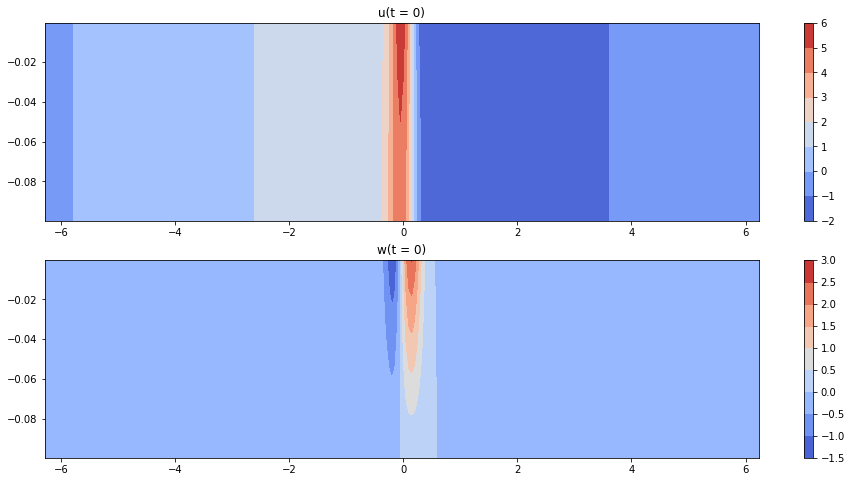

In [ ]:
# plot the initial fields
xx,zz = np.meshgrid(x,z,indexing='ij')

f = plt.figure(figsize=(16,8))
ax = f.add_subplot(2,1,1)
cax = ax.contourf(xx, zz, u0['g'],cmap=plt.cm.coolwarm)
ax.set(title='u(t = 0)')
cbar = f.colorbar(cax)

ax = f.add_subplot(2,1,2)
cax = ax.contourf(xx, zz, w0['g'],cmap=plt.cm.coolwarm)
ax.set(title='w(t = 0)')
cbar = f.colorbar(cax)

The surface height $\eta$ is related to the pressure perturbation at the upper surface, 

$$
\eta = p(z = 0)/g.
$$

We will create a diagnostic variable, `eta`, that calculates the surface height at each timestep. 

The initial pressure perturbation $p$ is zero everywhere, i.e. the flow starts off in hydrostatic balance and with a flat surface. 

(-0.1, 0.020000000000000004)

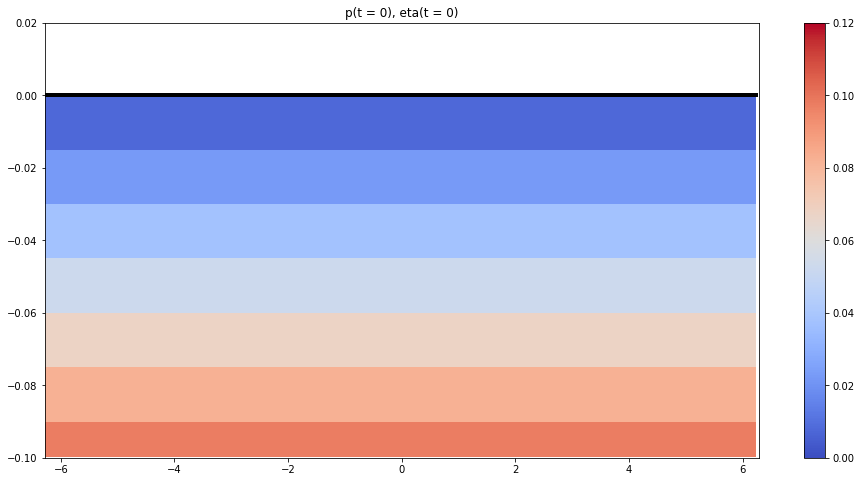

In [ ]:
# surface height
eta = np.zeros((int(T//dt)+1,nx))
eta[0] = np.copy(p['g'][:,-1])/g

# Make plot of the intial pressure and surface height field
f = plt.figure(figsize=(16,8))
ax = plt.axes()
cax = ax.contourf(xx, zz, p['g']-g*zz, vmin=0., vmax = 1.2*g*H, cmap=plt.cm.coolwarm)
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_array(p['g']-g*zz)
m.set_clim(0., 1.2*g*H)
plt.colorbar(m)
ax.plot(x[:,0],eta[0],lw=4,color='k')
ax.set(title='p(t = 0), eta(t = 0)')
ax.set_xlim(-L,L)
ax.set_ylim(-H,0.2*H)

## Solving the problem

Now we can run the simulation. We timestep our problem until a halting condition is reached, copying the grid values of the variables every 10 iterations. This should take less than a few minutes on most machines.

In [ ]:
# Analysis
p_list = [np.copy(p['g'])]
t_list = [solver.sim_time]
eta_list = [np.copy(p['g'][:,-1])/g]

# Main loop
try:
    logger.info('Starting loop')
    start_time = time.time()
    while solver.ok:
        dt = solver.step(dt)
        if (solver.iteration-1)%10==0:
            p_list.append(np.copy(p['g']))
            t_list.append(solver.sim_time)    
        if (solver.iteration-1) % 100 == 0:
            logger.info('Iteration: %i, Time: %e, dt: %e' %(solver.iteration, solver.sim_time, dt))
except:
    logger.error('Exception raised, triggering end of main loop.')
    raise
finally:
    end_time = time.time()
    logger.info('Iterations: %i' %solver.iteration)
    logger.info('Sim end time: %f' %solver.sim_time)
    logger.info('Run time: %.2f sec' %(end_time-start_time))
    logger.info('Run time: %f cpu-hr' %((end_time-start_time)/60/60*domain.dist.comm_cart.size))

2021-02-05 20:42:57,892 __main__ 0/1 INFO :: Starting loop
2021-02-05 20:42:57,965 __main__ 0/1 INFO :: Iteration: 1, Time: 7.947671e-02, dt: 7.947671e-02
2021-02-05 20:42:58,791 __main__ 0/1 INFO :: Iteration: 101, Time: 8.027147e+00, dt: 7.947671e-02
2021-02-05 20:42:59,581 __main__ 0/1 INFO :: Iteration: 201, Time: 1.597482e+01, dt: 7.947671e-02
2021-02-05 20:43:00,381 __main__ 0/1 INFO :: Iteration: 301, Time: 2.392249e+01, dt: 7.947671e-02
2021-02-05 20:43:01,151 __main__ 0/1 INFO :: Iteration: 401, Time: 3.187016e+01, dt: 7.947671e-02
2021-02-05 20:43:01,934 __main__ 0/1 INFO :: Iteration: 501, Time: 3.981783e+01, dt: 7.947671e-02
2021-02-05 20:43:02,704 __main__ 0/1 INFO :: Iteration: 601, Time: 4.776550e+01, dt: 7.947671e-02
2021-02-05 20:43:03,510 __main__ 0/1 INFO :: Iteration: 701, Time: 5.571317e+01, dt: 7.947671e-02
2021-02-05 20:43:04,314 __main__ 0/1 INFO :: Iteration: 801, Time: 6.366084e+01, dt: 7.947671e-02
2021-02-05 20:43:05,142 __main__ 0/1 INFO :: Iteration: 901, 

# Visualizing the flow

## Normalizing the perturbation fields

To visualize the flow, we will create images and movies of the perturbation fields, specifically, the pressure $p(x,z,t)$ and the surface height $\eta(x,t)$. However, one subtlety of using linearized equations is that the resulting dynamics are only defined up to a multiplicative constant, i.e. an amplitude. 

We are free to choose the amplitudes of the perturbations as we like. Since we would like to visualize the pressure perturbations on top of the base state hydrostatic pressure and the surface perturbation on top of the full depth of the fluid, we will take the maximum pressure perturbation to the 1/10th of the pressure at the bottom of the domain $p_0(-H) = g H$. 

Once we have the pressure field, the surface perturbation is calculated from $\eta(x,t) = p(x,z=0,t)/g$. By construction, the maximum amplitude of the surface perturbation will be 1/10th of the depth of the domain $H$. 

In [ ]:
# normalize pressure and surface perturbation amplitudes

p_list = p_list/np.max(np.abs(p_list))*0.1*g*H
eta_list = p_list[:,:,-1]/g

## Movie of pressure and surface height

Let's make a movie of the pressure and surface height perturbation. First, we will plot the model output and save them it a directory given by the variable `plot_dir`. Then we will define a new function `save_movie`, that will create a movie from individual snapshots of the pressure and surface height. 

As you watch the movie, look carefully at what happens to the initial surface perturbation. Remember that the domain is periodic, so a wave that move off one side of the domain will come back in the other side! 

In [ ]:
# create a new directory plot_dir (if it doesn't already exist)
plot_dir = 'plots_h' + str(H)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Make plot of surface height
for i in range(len(p_list)):
    
    # Make plot of the intial pressure and surface height field
    f = plt.figure(figsize=(16,8))
    ax = plt.axes()
    cax = ax.contourf(xx, zz, p_list[i]-g*zz, vmin=0., vmax = 1.2*g*H, cmap=plt.cm.coolwarm)
    m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
    m.set_array(p_list[i]-g*zz)
    m.set_clim(0., 1.2*g*H)
    plt.colorbar(m)
    ax.plot(x[:,0],eta_list[i],lw=4,color='k')
    ax.set_xlim(-L,L)
    ax.set_ylim(-H,0.2*H)
    f.savefig(plot_dir + '/height_{:0>3d}.png'.format(i),bbox_inches='tight')
    plt.close()
    if i%10 == 0: 
        print('Saved figure',i)

Saved figure 0
Saved figure 10
Saved figure 20
Saved figure 30
Saved figure 40
Saved figure 50
Saved figure 60
Saved figure 70
Saved figure 80
Saved figure 90
Saved figure 100


In [ ]:
def save_movie(image_filenames,movie_filename,framerate):
    os.system('ffmpeg -r ' + str(framerate) + ' -i ' + image_filenames + ' -vb 20M -vcodec mpeg4 -y ' + movie_filename)
    
# make movie
movie_filename = "movie_h" + str(H) + ".mp4"
save_movie(plot_dir + "/height_%03d.png",movie_filename,10)
print('Created movie')

Created movie


The following script should play the movie in your browser. If it doesn't play, you can click on the folder symbol to the left of the notebook. From here, you can simply download the movie and play it on your computer. 

In [ ]:
# play movie
from IPython.display import HTML
from base64 import b64encode
mp4 = open(movie_filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Dispersion relation

You might notice that the surface height perturbation appears to break up into individual waves that propagate at different speeds. The longest wavelength waves travel the fastest, while the shorter wavelength waves trail behind. 

The reason for this is that water waves are *dispersive waves*, which means that their phase speed (the speed of individial crests of the wave) depends on the wavelength. For water waves, the phase speed $c$ is given by

$$
c = \sqrt{\frac{g}{k} \, \tanh \left( k H \right)} 
$$

where $k$, the *wavenumber*, is the number of waves in a distance $2 \pi$. If the wavelength of the waves is given by $\lambda$, then the wavenumber is 

$$
k = \frac{2 \pi}{\lambda}.
$$

We will derive the above relation in your next assignment. From this relation, we can see that the phase speed $c$ will depend on the wavelength $\lambda$ as well as the depth of the domain $H$ and gravitational acceleration $g$. 

Let's look at the phase speed as a function of wavenumber. Remember that small values of $k$ correspond to long waves and large values of $k$ correspond to short waves. As you can see, short waves travel with a smaller phase speed than long waves, just as we saw in the movie. 

Text(0.5, 1.0, 'Phase speed vs wavenumber')

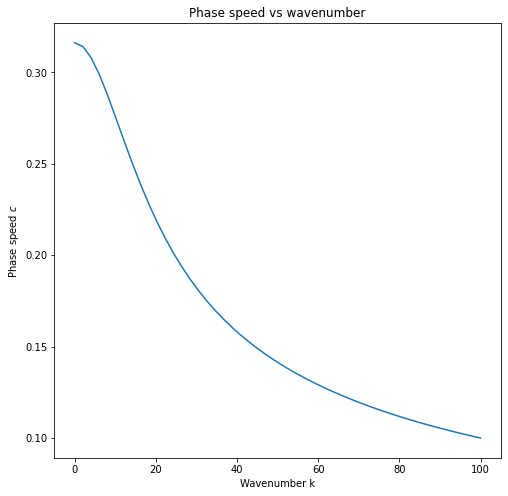

In [ ]:
# plot the phase speed as a function of wavenumber

k = np.linspace(0.01,100)
c = np.sqrt(g/k*np.tanh(k*H))

f = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.plot(k,c)
ax.set_xlabel('Wavenumber k')
ax.set_ylabel('Phase speed $c$ ')
ax.set_title('Phase speed vs wavenumber')

## Shallow water and deep water waves

Let's take a close look at the dispersion relation in the limit of short wavelength and long wavelength, respectively. 

For short wavelengths ($\lambda$ much smaller than $H$, or $k H \gg 1$) we can approximate the function 

$$
\tanh \left( k H \right) \approx 1,
$$

which gives a phase speed

$$
c \approx \sqrt{\frac{g}{k}} = \sqrt{ \frac{g \lambda}{2 \pi}}, \qquad \mbox{Deep water waves (short wavelength)}.
$$

These waves are called *deep water waves*, because the water depth $H$ is large compared with the wavelength. Deep water waves have a phase speed that depends on $k$, that is, they are *dispersive*. 

By contrast, for long wavelengths ($\lambda$ much larger than $H$, or $k H \ll 1$) we can approximate the function 

$$
\tanh \left( k H \right) \approx k H,
$$

which gives a phase speed

$$
c \approx \sqrt{g H}, \qquad \mbox{Shallow water waves (long wavelength)}.
$$

These waves are called *shallow water waves*, because the water depth $H$ is small compared with the wavelength. Shallow water waves have a phase speed that does not depend on $k$, which means that they travel at the same speed, regardless of wavelength: in other words, they are *non-dispersive*. 

## Space-time diagram


Another useful way to visualize dispersive and non-dispersive waves is using a *space-time diagram*. We plot the surface height perturbation as a function of distance $x$ (in the horizontal) and time $t$ (in the vertical). A wave crest propagating with a speed $c$ will trace out a line $x = c t$. 

Thus, we can visualize individual waves as diagnonal lines in a space time diagram. For dispersive waves (e.g. deep water waves), different wavelengths will travel with different phase speeds, which we visualize as lines on the space time diagram with different slopes. For non-dispersive waves (e.g. shallow water waves), all wavelengths travel at the same speed, so we will see lines with only one slope on the space time diagram. 

In this figure, we plot the space time diagram of the surface height. On top of this, we will trace lines with slope $c = \sqrt{g H}$, which corresponds to the phase speed of shallow water waves. 

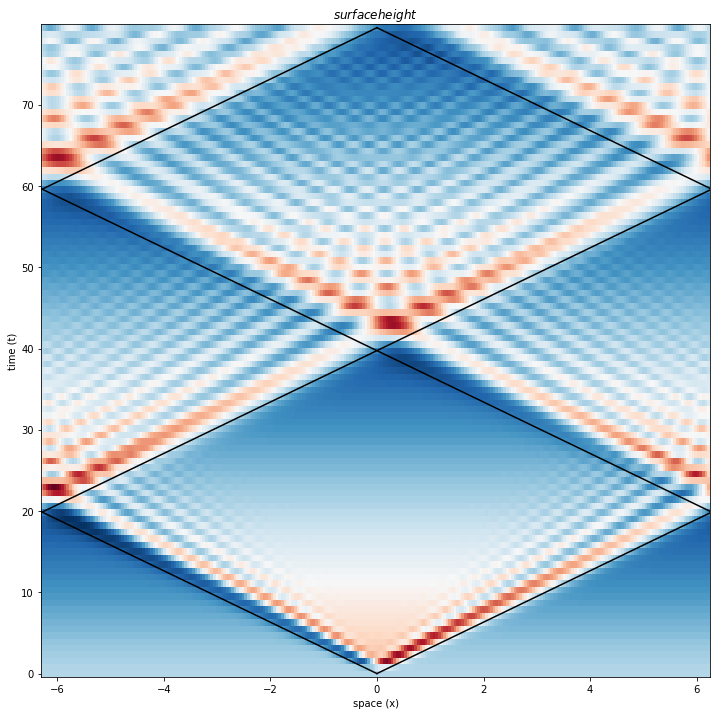

In [ ]:
import matplotlib.pyplot as plt

from dedalus.extras.plot_tools import quad_mesh, pad_limits

t_plot = np.linspace(0,T,len(eta_list))

xmesh, ymesh = quad_mesh(x=x[:,0], y=t_plot)

fig, ax = plt.subplots(figsize=(12,12))

ax.pcolormesh(xmesh, ymesh, eta_list, cmap='RdBu_r',clim=(-0.1,0.1))

# add characteristics for shallow water waves
for i in range(int(1 + 0.5*T*np.sqrt(g*H)/L)):
    ax.plot(t_plot*np.sqrt(g*H)-2*i*L,t_plot,color='k')
    ax.plot(-t_plot*np.sqrt(g*H)+2*i*L,t_plot,color='k')
    
ax.axis(pad_limits(xmesh, ymesh))
ax.set_xlabel('space (x)')
ax.set_ylabel('time (t)')
ax.set_title('$surface height$')
fig.savefig('spacetime_h' + str(H) + '.png')

## Now try it yourself


Use this notebook to experiment with the advection diffusion problem. Add your observations, comments, and calculations to the notebook by double clicking the cells to enter new text. You can then press **shift+enter** to turn the cell back into readable form. 

When you make changes to the problem parameters or initial conditions, you will need to rebuild the solver. To do this, just re-run each cell from the beginning (or use the "fast forward" symbol in the menu above). 

- Change the height $H$ of the domain and re-run the experiment. All plots, movies etc will be saved with a new name, for example the plots will be saved in a different directory. So don't worry about overwriting what you already plotted. 
- Look at values of $H$ between 0.01 (very shallow) to 1.0 (very deep). How does the initial perturbation evolve in each case? What about the space-time diagram? Are the waves dispersive or non-dispersive?
- Does modifying $g$ change anything?

- Why does the initial surface perturbation break up into individual waves for large values of $H$? Why does it stay coherent for small values of $H$? 
- Change the initial velocity condition for $w$ and see how it changes the resulting flow. 

- Think about how you would modify the equations of motion to model 3D waves. What boundary conditions could you impose? 

# Appendix 1: Equations of motion

## Constant density incompressible flow in 2D 

In this lab we will study water waves propagating in a 2D domain of length $L$ and height $H$. We define $x$ to be the horizontal coordinate and $z$ to be the vertical coordinate, so that the 2D velocity field is

$$
\mathbf{u} = \left( u, w \right).
$$

### Continuity equation

The continuity equation is

$$
\partial_t \rho = - \nabla \cdot \left( \rho \mathbf{u} \right).
$$

Note that we are using the 2D differential operator $\nabla = \left( \partial_x, \partial_z\right)$. To keep things simple, we will assume that the water has constant density $\rho = 1$. Substituting this into the continuity equation, we immediately find

$$
\mbox{Continuity equation:} \qquad \nabla \cdot \mathbf{u} = 0.
$$

Thus, the flow is incompressible, i.e. the velocity field has zero divergence everywhere. 

### Momentum equation

In addition we have the momentum equation with gravity acting in the $z$-direction.

$$
\partial_t \mathbf{u} + \mathbf{u} \cdot \nabla \mathbf{u} = - \nabla p - g \mathbf{\hat{z}}
$$

We can write this in terms of individual equations for the horizontal velocity $u$ and vertical velocity $w$: 

$$
x\mbox{-momentum equation:} \qquad \partial_t u + u \, \partial_x u + w \, \partial_z u = - p_x,
$$

$$
z\mbox{-momentum equation:} \qquad \partial_t w + u \, \partial_x w + w \, \partial_z w = - p_z - g.
$$

## Boundary conditions


So far the flow doesn't know anything about the domain: we need to specify boundary conditions at the left and right sides and the upper and lower boundaries. 

### No-normal flow condition

At the lower boundary, we don't want the fluid to move through the bottom of the domain. So we set the vertical velocity there to be zero,

$$
\mbox{No-normal flow BC:} \qquad w = 0 \quad \mbox{at} \quad z = -H. 
$$

This is called a _no normal-flow condition_: the velocity normal to the boundary is zero. 

### Kinematic boundary condition

At the upper boundary, the height of the fluid surface will vary in time and space. We will describe the height of the upper surface in terms of a deviation from its resting height at $z = 0$, 

$$
z = \eta(x,t).
$$

At any moment in time, the rate of change of $\eta(x,t)$ will be given by the vertical velocity at the upper surface,

$$
\mbox{Kinematic BC:} \qquad \frac{d \eta}{d t} = \partial_t \eta + u \, \eta_x = w \quad \mbox{at} \quad z = \eta (x,t).
$$

This is called the _kinematic boundary condition_ at the upper surface. 

### Pressure boundary condition

We also need to specify the pressure at the upper surface. In particular, we set the pressure in the fluid to match that in the air above. We are free to set the air pressure to be anything we like, so let's take it to be zero. This gives us the _pressure boundary condition_ at the upper boundary

$$
\mbox{Pressure BC:} \qquad p = 0 \quad \mbox{at} \quad z = \eta(x,t).
$$

### Periodic boundary condition

Finally, we need to specify the boundary conditions at the left and right sides of the domain. We will assume that the domain is periodic in the $x$-direction, so we impose _periodic boundary conditions_ so that $p$, $u$, and $w$ are all periodic functions in the $x$-direction. 

## Linear wave theory

### Basic state

Before we add waves to the system, let's first consider the solution when there is no motion. We call this the basic state, which we will indicate with a subscript $0$. In the basic state, the velocities are zero and the surface will be at rest, so

$$
u_0 = w_0 = \eta_0.
$$

The pressure however will satisfy the hydrostatic balance equation:

$$
\partial_z \; p_0 = - g, \qquad p_0(z) = -g z,
$$

where we have made use of the upper surface pressure boundary condition in the last equation. 

### Small perturbations

Now let's consider very small perturbations to the basic state:

$$
u = u', \quad w = w', \quad \eta = \eta', \quad p = p_0(z) + p',
$$

where all the variables with dashes have small amplitudes. Substituting these into the incompressibility condition and $x$ and $z$ momentum equations gives

$$
\mbox{Incompressibility:} \qquad \partial_x \; u' + \partial_z \; w' = 0.
$$

$$
x\mbox{-momentum equation:} \qquad \partial_t u' + u' \; \partial_x u' + w' \; \partial_z u' = - \partial_x p'.
$$

$$
z\mbox{-momentum equation:} \qquad \partial_t w' + u' \; \partial_x w' + w' \; \partial_z w' = - \partial_z p'.
$$

Notice that the basic state pressure $p_0(z)$ cancels the gravitational acceleration in the last equation.

We also need to consider what happens to the boundary conditions. The no-normal flow condition at the bottom boundary and the kinematic boundary condition at the upper boundary will be unchanged

$$
\mbox{No-normal flow condition:} \qquad w' = 0 \quad \mbox{on} \quad z = -H.
$$

$$
\mbox{Kinematic boundary condition:} \qquad \partial_t \eta' + u' \; \partial_x \eta' = w', \quad \mbox{on} \quad z = \eta'.
$$

However, we need to change the pressure boundary condition at the upper boundary to take into account the basic state pressure, i.e,

$$
p_0 + p' = 0, \quad \mbox{on} \quad z = \eta'.
$$

Using $p_0(z) = - g z$ and setting $z = \eta'$, this becomes

$$
\mbox{Pressure boundary condition:} \qquad p' - g \eta' = 0, \quad \mbox{on} \quad z = \eta'.
$$

### Linearized equations of motion 

We have assumed that the variables $u'$, $w'$, $p'$ and $\eta'$ are all small quantities. This implies that we can neglect any nonlinear terms involving these quantities in the equations of motion. 

The incompressibility condition is already linear in $u'$ and $w'$, so there are no nonlinear terms to discard. Thus, we leave this equation as it is: 

$$
\mbox{Incompressibility:} \qquad \partial_x \, u' + \partial_z \, w' = 0.
$$

The $x$-momentum equation, on the other hand, has two nonlinearities: $u' \, \partial_x \, u'$ and $w' \, \partial_z \, u'$. We neglect each of these to obtain

$$
x\mbox{-momentum equation:} \qquad \partial_t \,u' = - \partial_x \,p'.
$$

Likewise, neglecting the nonlinearities in the $z$-momentum equation gives

$$
z\mbox{-momentum equation:} \qquad \partial_t \,w' = - \partial_z \,p'.
$$

### Linearized boundary conditions 

We also need to deal with the nonlinearities appearing in the boundary conditions. The no-normal flow condition is already linear, so it is unchanged: 

$$
\mbox{No-normal flow condition:} \qquad w' = 0 \quad \mbox{on} \quad z = -H.
$$

The pressure boundary condition, $p' - g \, \eta' = 0$ at the upper surface, _appears_ to be linear too. However, the boundary conditon is applied at the upper surface $z = \eta'$, which makes the boundary condition nonlinear. This can be clearly seen by Taylor expanding about the point $z = 0$

$$
p'(z = \eta') = p'(z = 0) + \partial_z \, p' (0) \; \eta' + \cdots 
$$

Thus, we neglect the nonlinearities by evaluating the upper boundary condition at $z = 0$ rather than $z = \eta'$

$$
\mbox{Pressure boundary condition:} \qquad p' - g \, \eta' = 0, \quad \mbox{on} \quad z = 0.
$$

Finally, the kinematic boundary condition has the nonlinearity $u' \partial_x \, \eta'$ as well as the nonlinearity due to evaluation at the upper surface $z = \eta'$. We neglect the first and remove the second by evaluating the boundary condition at $z = 0$: 

$$
\mbox{Kinematic boundary condition:} \qquad \partial_t \, \eta'  = w', \quad \mbox{on} \quad z = 0.
$$

As a final step, we eliminate $\eta'$ by combining the last two conditions into a single boundary condition at the upper boundary: 

$$
\mbox{Upper boundary condition:} \qquad \partial_t \, p' - g \, w' = 0, \quad \mbox{on} \quad z = 0.
$$

# Appendix 2: Solutions to exercises

**Exercise 1: Dedalus equation entry for linearized equations of motion**

```
# equations
problem.add_equation("dx(u) + dz(w) = 0")
problem.add_equation("dt(u) + dx(p) = 0")
problem.add_equation("dt(w) + dz(p) = 0")

# boundary conditions
problem.add_bc("left(w) = 0")
problem.add_bc("right(dt(p) - g*w) = 0")
```